In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import os 
from PIL import Image
import cv2 as cv 

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras.preprocessing import image
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array
from keras.applications.vgg19 import decode_predictions, preprocess_input, VGG19
from keras.callbacks import EarlyStopping

In [4]:
np.random.seed(42)

In [5]:
train_data = 'Images/training/'

In [6]:
vgg = VGG19(weights= 'imagenet', include_top=False, input_shape=(224,224, 3))
for layer in vgg.layers:
    layer.trainable = False

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
target = (224,224)
batch = 4
epochs = 50

In [9]:
train_generator = train_datagen.flow_from_directory(
    directory=train_data,
    target_size=target,
    batch_size=batch,
    class_mode='categorical',
)

Found 84 images belonging to 6 classes.


In [10]:
x = vgg.output
x = GlobalAveragePooling2D()(x) 
x = Dense(256, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=predictions)

In [11]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
early_stopping_callback = EarlyStopping(
    monitor='loss',  
    patience=3,       
    restore_best_weights=True  
)

In [13]:
history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[early_stopping_callback]
)

Epoch 1/50
21/21 [==============================] - 25s 344ms/step - loss: 2.4298 - accuracy: 0.3095
Epoch 2/50
21/21 [==============================] - 8s 362ms/step - loss: 1.6288 - accuracy: 0.3452
Epoch 3/50
21/21 [==============================] - 7s 343ms/step - loss: 1.5750 - accuracy: 0.4167
Epoch 4/50
21/21 [==============================] - 7s 342ms/step - loss: 1.5725 - accuracy: 0.3571
Epoch 5/50
21/21 [==============================] - 6s 303ms/step - loss: 1.5583 - accuracy: 0.3214
Epoch 6/50
21/21 [==============================] - 8s 381ms/step - loss: 1.4979 - accuracy: 0.3571
Epoch 7/50
21/21 [==============================] - 8s 378ms/step - loss: 1.4875 - accuracy: 0.4167
Epoch 8/50
21/21 [==============================] - 7s 325ms/step - loss: 1.5291 - accuracy: 0.4048
Epoch 9/50
21/21 [==============================] - 8s 369ms/step - loss: 1.4025 - accuracy: 0.4286
Epoch 10/50
21/21 [==============================] - 6s 271ms/step - loss: 1.3992 - accuracy: 0.464

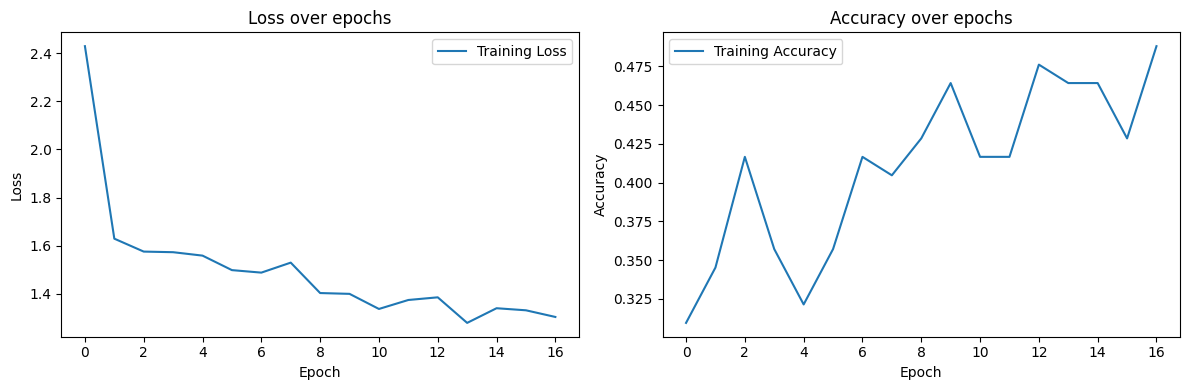

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.save("baldness.h5")